In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import ipywidgets as ipw
from ipywidgets import interact

In [2]:
import joblib

# Importing the model
filename = './models/forest_model.pkl'
model = joblib.load(filename)

## Prepare the data same way it was prepared before

In [112]:
turnip_data = pd.read_csv('../Database/stonksData.csv')
df = turnip_data[turnip_data['Pattern'].notnull()]
pattern_classes = ['Fluctuating', 'Small Spike', 'Large Spike', 'Decreasing']
pattern_label   = 'Pattern'
pattern_feature = list(df.columns[df.columns != 'Pattern'])
df_X, df_y = df[pattern_feature].values, df[pattern_label].values
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_y)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [104]:
def prob_predict(model, prices):
    if np.isnan(prices).any():
        prices = imp.transform(prices)
    model.predict(prices)
    probs = model.predict_proba(prices)
    prob100 = prob * 100
    plt.bar(pattern_classes, prob100.reshape(4,))
    plt.ylabel('Probability')
    return probs

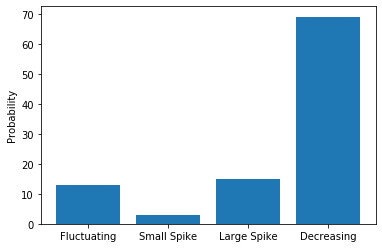

In [105]:
prob = prob_predict(model, X_train[0:1])

In [124]:
prevPattern = ['Fluctuating', 'Small Spike', 'Large Spike', 'Decreasing', 'Unknown']
mondayAM = ipw.IntText(description='Monday AM')
mondayPM = ipw.IntText(description='Monday PM')
tuesdayAM = ipw.IntText(description='Tuesday AM')
tuesdayPM = ipw.IntText(description='Tuesday PM')
wednesdayAM = ipw.IntText(description='Wedenesday AM')
wednesdayPM = ipw.IntText(description='Wedenesday PM')
thursdayAM = ipw.IntText(description='Thursday AM')
thursdayPM = ipw.IntText(description='Thursday PM')
fridayAM = ipw.IntText(description='Friday AM')
fridayPM = ipw.IntText(description='Friday PM')
saturdayAM = ipw.IntText(description='Saturday AM')
saturdayPM = ipw.IntText(description='Saturday PM')
sunday = ipw.IntText(description='Sunday Price')
prevPattern = ipw.Dropdown(options=prevPattern,description='Previous Pattern')

In [128]:
morning_row = ipw.HBox([mondayAM, tuesdayAM, wednesdayAM, thursdayAM, fridayAM, saturdayAM])
evening_row = ipw.HBox([mondayPM, tuesdayPM, wednesdayPM, thursdayPM, fridayPM, saturdayPM])
dataDisp = ipw.VBox([prevPattern, sunday, morning_row, evening_row])
dataDisp

In [149]:
interact(prob_predict, )

ValueError: cannot find widget or abbreviation for argument: 'dataDisp'

SyntaxError: invalid syntax (<ipython-input-143-f195c1342970>, line 1)